# Intro

In this notebook we will see how we can make a clustering of numerical values. We will use Iris dataset, which describes Iris flowers.


This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# Libraries import

In [31]:
import sklearn.cluster as clust
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris


In [32]:
%matplotlib inline

# Reading data

In [39]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['y'] = iris.target

In [40]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Data exploration

Let's make a plot of sepal length and sepal width

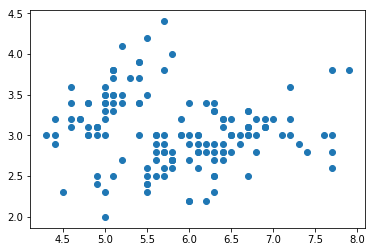

In [37]:
plt.scatter(...)

It seems that there are couple of clusters. We can try differnet clustering methods to check it

# K means clustering

In [50]:
columns_to_cluster = ['sepal length (cm)', 'sepal width (cm)']

In [38]:
from sklearn.cluster import KMeans

Let's define some helper function to print clustering results. We will use it multiple times.

In [60]:
def print_clustering(data, labels):
    labels_and_styles = dict(zip(range(5), list("v*+xDop")))
    
    for i in range(data.shape[0]):
        lab = labels[i]
        marker = labels_and_styles.get(lab, '*')
        plt.scatter(data.iloc[i, 0], data.iloc[i, 1], marker=labels_and_styles[lab], c=lab)
    
    plt.show()
        

Let's try couple of different clustering methods with differnent cluster styles

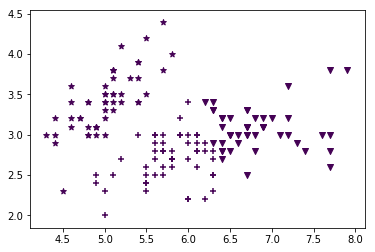

In [61]:
k_3 = KMeans(n_clusters=3)
k_3.fit(data[columns_to_cluster])
print_clustering(data[columns_to_cluster], k_3.labels_)

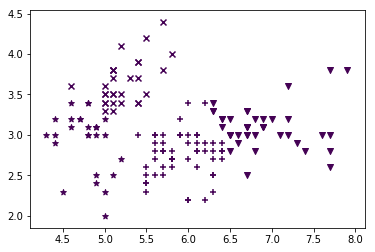

In [62]:
k_4 = KMeans(n_clusters=4)
k_4.fit(data[columns_to_cluster])
print_clustering(data[columns_to_cluster], k_4.labels_)

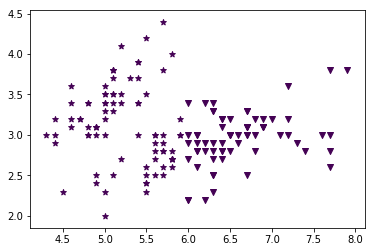

In [64]:
k_2 = KMeans(n_clusters=2)
k_2.fit(data[columns_to_cluster])
print_clustering(data[columns_to_cluster], k_2.labels_)

# Clustering quality

We can check clustering quality, by calculating ratio of:


1. Average **within** cluster scatter (spread of each cluster)
2. Average **between** cluster scatter (spread between clusters)

checking ratio betweeen them.

This is called **SILHOUETTE COEFFICIENT**

Formally:


* a: The mean distance between a sample and all other points in the same class.
* b: The mean distance between a sample and all other points in the next nearest cluster.



$$ s = \frac{b - a }{max(a,b)} $$


Another measture is called **Kalinski-Harabaz Score**, slightly more complicated to compute:

* N - number of data points
* k - number of cluster

$$W_k = \sum^k_{q=1} \sum_{x \in C_1} (x - c_q)^2$$


$$B_k = \sum^k_{q=1} n_q (c_q -c)^2 $$

$$calinski(k) = \frac{Tr(B_k)}{Tr(W_k)} \times \frac{N-K}{K-1}$$

**Calinski-Harabaz** score is recommended, as it takes into account if there are multiple small, nonimportant clusters!!!

In [77]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score

k_clusters = []
silhouette = []
calinski = []

for k in range(2, 10):
    km = KMeans( ... )
    km.fit( ... )
    sc = silhouette_score( ... )
    cal = calinski_harabaz_score( ... )
    k_clusters.append(k)
    silhouette.append(sc)
    calinski.append(cal)

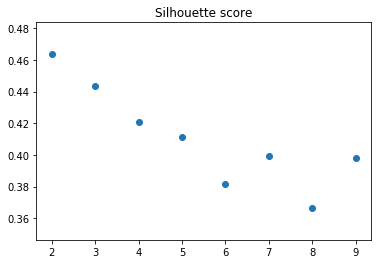

In [84]:
plt.scatter(x=k_clusters, y=silhouette)
_ = plt.title("Silhouette score")

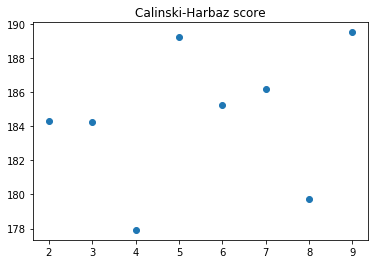

In [85]:
plt.scatter(x=k_clusters, y=calinski)
_ = plt.title("Calinski-Harbaz score")

So called **elbow method** tells us, that we should take take number of clusters equal to first value, when plot starts to **flatten out** :)

# Your task

Build clustering solution to find optimal number of clusters in a provided example dataset

In [117]:
example_data = pd.read_csv("./sample_clustering.csv")

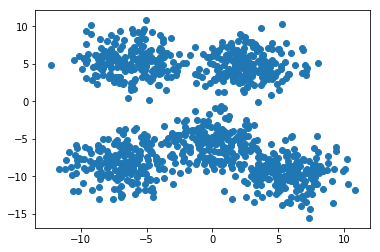

In [120]:
plt.scatter(example_data.f1, example_data.f2)

How many clusters should there be? How will you find them?

In [ ]:
...